#HW_9

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow.keras.regularizers import l2

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train, X_test = X_train / 255., X_test / 255.

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=784,
    validation_data=(x_val, y_val)
)

Epoch 1/30
77/77 [==============================] - 2s 15ms/step - loss: 0.7833 - accuracy: 0.7442 - val_loss: 0.5299 - val_accuracy: 0.8254
Epoch 2/30
77/77 [==============================] - 1s 11ms/step - loss: 0.4859 - accuracy: 0.8350 - val_loss: 0.4512 - val_accuracy: 0.8449
Epoch 3/30
77/77 [==============================] - 1s 11ms/step - loss: 0.4396 - accuracy: 0.8487 - val_loss: 0.4213 - val_accuracy: 0.8568
Epoch 4/30
77/77 [==============================] - 1s 12ms/step - loss: 0.4149 - accuracy: 0.8558 - val_loss: 0.3925 - val_accuracy: 0.8668
Epoch 5/30
77/77 [==============================] - 1s 12ms/step - loss: 0.3888 - accuracy: 0.8653 - val_loss: 0.3789 - val_accuracy: 0.8674
Epoch 6/30
77/77 [==============================] - 1s 11ms/step - loss: 0.3767 - accuracy: 0.8689 - val_loss: 0.3598 - val_accuracy: 0.8736
Epoch 7/30
77/77 [==============================] - 1s 11ms/step - loss: 0.3615 - accuracy: 0.8733 - val_loss: 0.3478 - val_accuracy: 0.8808
Epoch 8/30
77

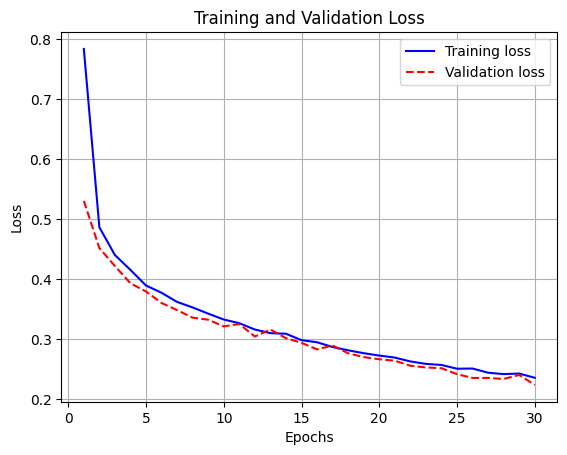

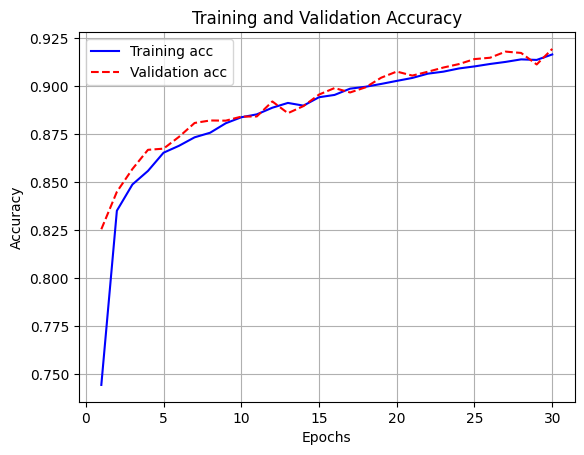

In [9]:

history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)


plt.plot(epochs, history_dict['loss'], 'b-', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'r--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

plt.clf()

# Plot training and validation accuracy
plt.plot(epochs, history_dict['accuracy'], 'b-', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'r--', label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8831


#HW_10.1

In [11]:

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255., x_test / 255.

In [12]:

model = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),



    Flatten(),
    Dropout(0.5),
    Dense(64, activation="relu"),

    Dense(10, activation="softmax")
])

In [24]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 1, 1, 256)        

In [26]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_val, y_val)
)

Epoch 1/20
196/196 [==============================] - 145s 734ms/step - loss: 0.9850 - accuracy: 0.6963 - val_loss: 0.6519 - val_accuracy: 0.8049
Epoch 2/20
196/196 [==============================] - 141s 721ms/step - loss: 0.6348 - accuracy: 0.8097 - val_loss: 0.5264 - val_accuracy: 0.8378
Epoch 3/20
196/196 [==============================] - 141s 722ms/step - loss: 0.5399 - accuracy: 0.8326 - val_loss: 0.4595 - val_accuracy: 0.8515
Epoch 4/20
196/196 [==============================] - 145s 740ms/step - loss: 0.4784 - accuracy: 0.8493 - val_loss: 0.4153 - val_accuracy: 0.8676
Epoch 5/20
196/196 [==============================] - 146s 745ms/step - loss: 0.4319 - accuracy: 0.8595 - val_loss: 0.3810 - val_accuracy: 0.8753
Epoch 6/20
196/196 [==============================] - 150s 768ms/step - loss: 0.3996 - accuracy: 0.8686 - val_loss: 0.3803 - val_accuracy: 0.8725
Epoch 7/20
196/196 [==============================] - 150s 765ms/step - loss: 0.3769 - accuracy: 0.8746 - val_loss: 0.3439 -

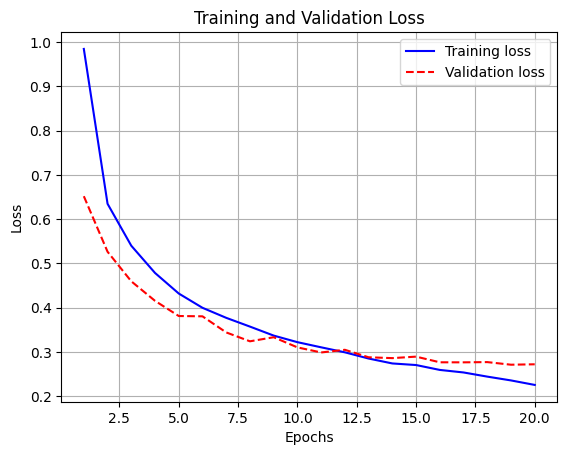

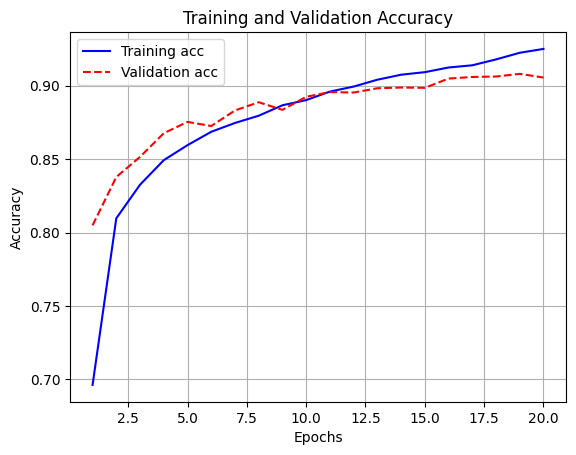

In [27]:

history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)


plt.plot(epochs, history_dict['loss'], 'b-', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'r--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

plt.clf()

# Plot training and validation accuracy
plt.plot(epochs, history_dict['accuracy'], 'b-', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'r--', label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

In [28]:

test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.2998 - accuracy: 0.9009


**Висновок:** У цьому випадку згорткова мережа додає лише декілька відсотків точності у порівнянні з багатошаровою моделлю. Але займає занадто багато часу на тренування. Тому можу сказати що у даному випадку для швидкого та досить точного результату можна використовувати багатошарову модель.

#HW_10.2


In [3]:

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# transform to rgb
x_train=tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=3))
x_test=tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=3))

#resize to minimum size of (32x32)
x_train=tf.image.resize_with_pad(x_train,32,32)
x_test=tf.image.resize_with_pad(x_test,32,32)

x_train, x_test = x_train / 255., x_test / 255.

4422102/4422102 [==============================] - 0s 0us/step


In [4]:


conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [24]:
model = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(10, activation="softmax"),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                      

In [26]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=2048,
)

Epoch 1/50
30/30 [==============================] - 7s 183ms/step - loss: 1.1579 - accuracy: 0.6278
Epoch 2/50
30/30 [==============================] - 6s 186ms/step - loss: 0.6476 - accuracy: 0.7765
Epoch 3/50
30/30 [==============================] - 6s 186ms/step - loss: 0.5547 - accuracy: 0.8032
Epoch 4/50
30/30 [==============================] - 6s 190ms/step - loss: 0.5028 - accuracy: 0.8217
Epoch 5/50
30/30 [==============================] - 6s 191ms/step - loss: 0.4741 - accuracy: 0.8311
Epoch 6/50
30/30 [==============================] - 6s 195ms/step - loss: 0.4480 - accuracy: 0.8401
Epoch 7/50
30/30 [==============================] - 6s 196ms/step - loss: 0.4335 - accuracy: 0.8436
Epoch 8/50
30/30 [==============================] - 6s 198ms/step - loss: 0.4175 - accuracy: 0.8490
Epoch 9/50
30/30 [==============================] - 6s 198ms/step - loss: 0.4086 - accuracy: 0.8524
Epoch 10/50
30/30 [==============================] - 6s 202ms/step - loss: 0.3955 - accuracy: 0.8563

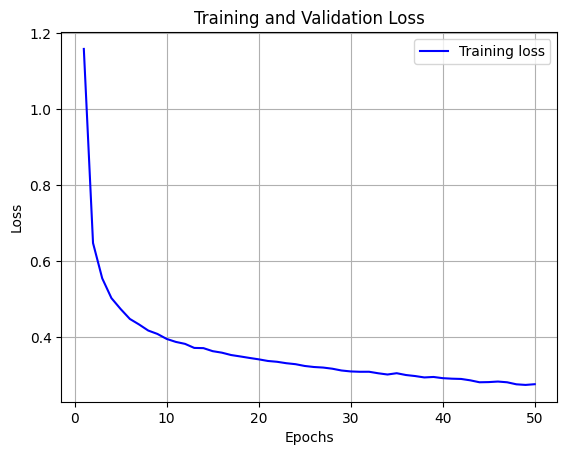

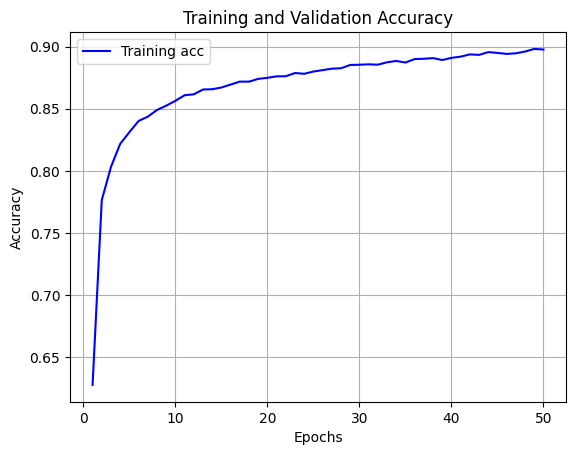

In [27]:
history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)


plt.plot(epochs, history_dict['loss'], 'b-', label='Training loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

plt.clf()

# Plot training and validation accuracy
plt.plot(epochs, history_dict['accuracy'], 'b-', label='Training acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3541 - accuracy: 0.8763


**Висновок:** У цьому випадку з моїми параметрами згортокова модель з використанням VGG16, має майже таку саму точність що й багатошарова модель з попередьньої домашньої роботи. Тому можу зробити висновок що використання оббох методів у данному випадку є однаково ефективним.